In [1]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

C:\Users\IAN\anaconda3\envs\Tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import tensorflow as tf

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255)
train_dir=r'.\DogsAndCats\train'
validation_dir=r'.\DogsAndCats\validation'
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

# 檢查數據生成器的輸出
print(train_generator.class_indices)
print(validation_generator.class_indices)

# 檢查一個批次的數據
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break
#Make sure dataset or generator can generate at least `steps_per_epoch * epochs` batches
#here batches is 100 and 50
#use .repeat()
train_dataset=tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(tf.TensorSpec(shape=(None,150,150,3),dtype=tf.float32),tf.TensorSpec(shape=(None,),dtype=tf.float32)))
train_datasets=train_dataset.repeat()
validation_dataset=tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(tf.TensorSpec(shape=(None,150,150,3),dtype=tf.float32),tf.TensorSpec(shape=(None,),dtype=tf.float32)))
validation_datasets=validation_dataset.repeat()

history=model.fit(
    train_datasets,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_datasets,
    validation_steps=50)

model.save('DogsAndCats_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 461ms/step - accuracy: 0.4899 - loss: 0.7016 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - accuracy: 0.5038 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.5349 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.5171 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.5284 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6860
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.5470 - loss: 0.6831 - val_accuracy: 0.5930 - val_loss: 0.6613
Epoch 7/30
100/100 ━━━

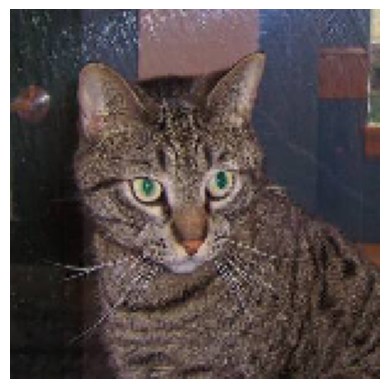

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
這是一隻貓


In [3]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# 載入圖片
image_path = ".\\predict\\cat.jpg"
image = load_img(image_path, target_size=(150, 150))

# 顯示圖片
plt.imshow(image)
plt.axis('off')
plt.show()

# 將圖片轉換為 Numpy 陣列
image_array = img_to_array(image)
image_array = image_array / 255.0  # 正規化像素值

# 將圖片轉換為批次（batch）格式，因為模型期望的輸入是一個批次
image_batch = tf.expand_dims(image_array, axis=0)

# 加載訓練好的模型
#model = tf.keras.models.load_model('path/to/your/model.h5')

# 進行預測
predictions = model.predict(image_batch)

# 判斷預測結果
if predictions[0] > 0.5:
    print("這是一隻狗")
else:
    print("這是一隻貓")

    

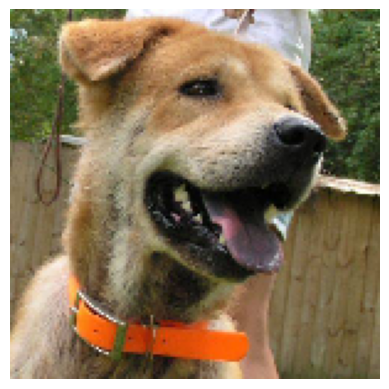

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
這是一隻狗


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# 載入圖片
image_path = ".\\predict\\dog.jpg"
image = load_img(image_path, target_size=(150, 150))

# 顯示圖片
plt.imshow(image)
plt.axis('off')
plt.show()

# 將圖片轉換為 Numpy 陣列
image_array = img_to_array(image)
image_array = image_array / 255.0  # 正規化像素值

# 將圖片轉換為批次（batch）格式，因為模型期望的輸入是一個批次
image_batch = tf.expand_dims(image_array, axis=0)

# 加載訓練好的模型
#model = tf.keras.models.load_model('path/to/your/model.h5')

# 進行預測
predictions = model.predict(image_batch)

# 判斷預測結果
if predictions[0] > 0.5:
    print("這是一隻狗")
else:
    print("這是一隻貓")

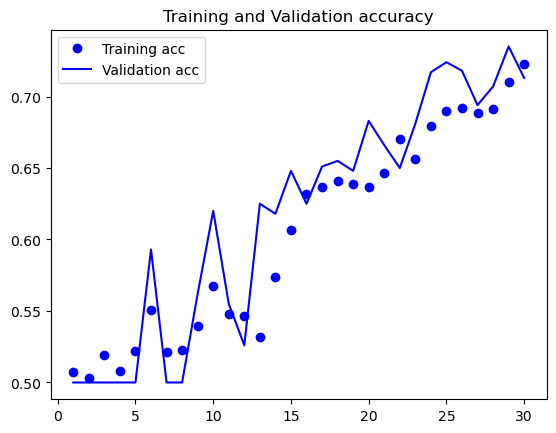

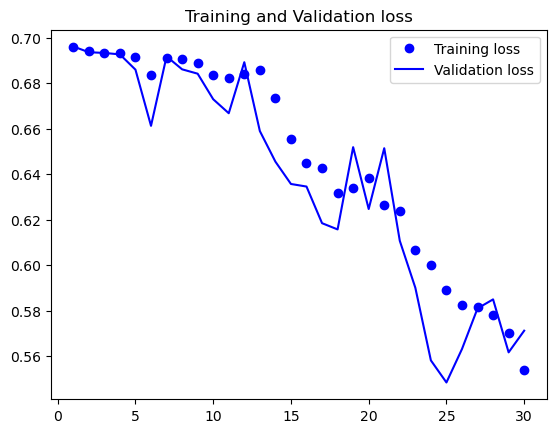

In [5]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()